In [8]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Questions


slimatetoolbox.org -- future-climate-scatter
* which models to use - generate summary of all models or for each model??
* 

Which model / models should we use?

these models use an analog approach to develop downscaled data from the global climate model (GCM)

Benefits -- 

* allows for daily data / provides daily data
* higher spatial res - 4km 

all downscaled data are based upon some observed data

this data gridmet data

observed gridded data is used to train the downscaling
the historic data is actually modeled data - not actual data! 

n....
nasa noaa dataset 

bias correction -- is a big part of the downscaling... 

the gridmet data is the actual station based (and satellite) observation data
so this might be used as a comparison to the modeled historic data


so they are downlscaling from 1-300km cmip data to the 4k maca2

# Tasks

* get the data
* extract some summary values?
* export csv 
* export geotiffs


In [1]:
dirPath = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/'

# Might be some other variables 
# vpd & pet 
VARNAME = ('tasmax', 'tasmin', 'rhsmax', 'rhsmin',
           'pr', 'rsds', 'uas', 'vas', 'huss')

VARLONGNAME = ('air_temperature', 'air_temperature', 'relative_humidity', 'relative_humidity',
               'precipitation', 'surface_downwelling_shortwave_flux_in_air',
               'eastward_wind', 'northward_wind', 'specific_humidity')
# Models
MODELNAME = ('bcc-csm1-1', 'bcc-csm1-1-m', 'BNU-ESM', 'CanESM2',
             'CCSM4', 'CNRM-CM5', 'CSIRO-Mk3-6-0',
             'GFDL-ESM2G', 'GFDL-ESM2M',
             'HadGEM2-CC365', 'HadGEM2-ES365',
             'inmcm4', 'IPSL-CM5A-MR', 'IPSL-CM5A-LR', 
             'IPSL-CM5B-LR',
             'MIROC5', 'MIROC-ESM', 'MIROC-ESM-CHEM', 
             'MRI-CGCM3', 'NorESM1-M')

# All three of these are modeled output - not real data but based upon training data
# the historical data may be a bit off the real data but the long term means should match... 
# but these are all still models  -- so based upon the historic projected data - we know the uncertainty
# and then that same model is used to project out into the future where we can't predict uncertainty but we know the 
# historic uncertainty ... 
SCENNAME = ('historical', 'rcp45', 'rcp85')


YEAR_START = ('1950', '2006', '2006')
YEAR_END = ('2005', '2099', '2099')
RUN_NUM = [1] * 20
RUN_NUM[4] = 6  # setting CCSM4 with run 6
DOMAIN = 'CONUS'

# lat/lon pairs for point locations
LAT_TARGETS = [46.7317]
LON_TARGETS = [116.9972]

In [21]:
# Here you can populate the url to download your data 
# Modify the model, var and scen values below to populate the url
# The url will print at the end of the cell
model = 1
var = 0
scen = 1
time = YEAR_START[scen] + '_' + YEAR_END[scen]

fileName = ('agg_macav2metdata_' +
            str(VARNAME[var])+'_' +
            str(MODELNAME[model]) +
            '_r' +
            str(RUN_NUM[model]) +
            'i1p1_' + str(SCENNAME[scen]) +
            '_' + time + '_' +
            DOMAIN + '_daily.nc')

data_url = dirPath+fileName
data_url

'http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_tasmax_bcc-csm1-1-m_r1i1p1_rcp45_2006_2099_CONUS_daily.nc'

In [22]:
# Open the netcdf file using xarray
with xr.open_dataset(data_url) as file_nc:
    data_xr = file_nc

# xarray object
data_xr

<xarray.Dataset>
Dimensions:          (crs: 1, lat: 585, lon: 1386, time: 34333)
Coordinates:
  * lat              (lat) float64 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
  * crs              (crs) int32 1
  * lon              (lon) float64 235.2 235.3 235.3 235.4 ... 292.9 292.9 292.9
  * time             (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2099-12-31
Data variables:
    air_temperature  (time, lat, lon) float32 ...
Attributes:
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   GRID
    title:                           Downscaled daily meteorological data of ...
    summary:                         This archive contains daily downscaled m...
    keywords:                        daily precipitation, daily maximum tempe...
    keywords_vocabulary:             
    standard_name_vocabulary:        CF-1.0
    history:                         No revisions.
    comment:                         
    geospatial_bounds:               POLYGON((-124.7722 25.0631,-124.7722 49....
    geospatial_lat_min:              25.0631
    geospatial_lat_max:              49.3960
    geospatial_lon_min:              -124.7722
    geospatial_lon_max:              -67.0648
    geospatial_lat_units:            decimal degrees north
    geospatial_lon_units:            decimal degrees east
    geospatial_lat_resolution:       0.0417
    geospatial_lon_resolution:       0.0417
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         0.0
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    up
    time_coverage_start:             2091-01-01T00:0
    time_coverage_end:               2095-12-31T00:00
    time_coverage_duration:          P5Y
    time_coverage_resolution:        P1D
    date_created:                    2014-05-15
    date_modified:                   2014-05-15
    date_issued:                     2014-05-15
    creator_name:                    John Abatzoglou
    creator_url:                     http://maca.northwestknowledge.net
    creator_email:                   jabatzoglou@uidaho.edu
    institution:                     University of Idaho
    processing_level:                GRID
    project:                         
    contributor_name:                Katherine C. Hegewisch
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  
    publisher_email:                 
    publisher_url:                   
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326

In [25]:
# Plot time series for a specific location
a_year = data_xr["air_temperature"].sel(lat=45.02109146118164,
                                        lon=243.01937866210938)
a_year

<xarray.DataArray 'air_temperature' (time: 34333)>
array([278.81772, 278.82394, 279.69788, ..., 272.8692 , 270.81506, 271.91568],
      dtype=float32)
Coordinates:
    lat      float64 45.02
    lon      float64 243.0
  * time     (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2099-12-31
Attributes:
    long_name:      Daily Maximum Near-Surface Air Temperature
    units:          K
    grid_mapping:   crs
    standard_name:  air_temperature
    height:         2 m
    cell_methods:   time: maximum(interval: 24 hours)
    _ChunkSizes:    [162  51 123]

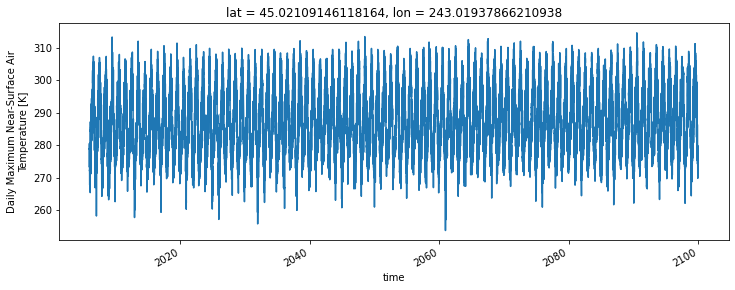

In [30]:
f, ax = plt.subplots(figsize=(12,4))
a_year.plot(ax=ax)
plt.show()

In [ ]:


#--------------------------------------------------------
#   FORM FILENAME AND GET HANDLE TO FILE AND LAT/LON 
#--------------------------------------------------------

filehandle=Dataset(fullfilename,'r')
lat=filehandle.variables['lat']
lon=filehandle.variables['lon']
http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_tasmin_bcc-csm1-1-m_r1i1p1_historical_1950_2005_CONUS_daily.nc
from netCDF4 import Dataset
import numpy as np
#--------------------------------------------------------
#   LAT/LON CHOICES
#--------------------------------------------------------
#this is how you can loop over the point locations
#for station in enumerate(LAT_TARGETS):
station=0
lat_targ = LAT_TARGETS[station]   
lon_targ=360-LON_TARGETS[station] #should be in [0 360 ]E

#--------------------------------------------------------
#   LAT/LON DATA
#--------------------------------------------------------
lathandle=filehandle.variables['lat']
lonhandle=filehandle.variables['lon']
lat = lathandle[:]
lon = lonhandle[:]
#--------------------------------------------------------
#  GET LAT/LON NEAREST SELECTED LAT/LON
#--------------------------------------------------------
lat_index =   (np.abs(lat-lat_targ)).argmin() 
lon_index =   (np.abs(lon-lon_targ)).argmin()

if(lat[lat_index]>lat_targ):
    if(lat_index!=0):
        lat_index = lat_index - 1
if(lon[lon_index]>lon_targ):
    if(lon_index!=0):
        lon_index = lon_index - 1 
print lat[lat_index] 
print lon[lon_index] -360
46.7294006348
-117.022277832
from netCDF4 import Dataset

#this is how you can loop over the MODELNAMEs, VARNAMES
#for var,varName in enumerate(VARNAME):
var=0  #tasmax
#for model,modelName in enumerate(MODELNAME):
model=0 #bcc-csm-1-1
#--------------------------------------------------------
#   GET HISTORIC DATA
#--------------------------------------------------------
scen=0
Time=YEAR_START[scen]+'_'+YEAR_END[scen]
fileName = ('agg_macav2metdata_'+str(VARNAME[var])+'_'+str(MODELNAME[model])+'_r'+str(RUN_NUM[model])+'i1p1_'+str(SCENNAME[scen])+'_'+Time+'_'+DOMAIN+'_daily.nc')   
fullfilename= dirPath+fileName 
filehandle=Dataset(fullfilename,'r')
datahandle=filehandle.variables[VARLONGNAME[var]]
histdata = datahandle[:,lat_index,lon_index]
#--------------------------------------------------------
#   GET FUTURE DATA
#--------------------------------------------------------  
scen=1
Time=YEAR_START[scen]+'_'+YEAR_END[scen]
fileName = ('agg_macav2metdata_'+str(VARNAME[var])+'_'+str(MODELNAME[model])+'_r'+str(RUN_NUM[model])+'i1p1_'+str(SCENNAME[scen])+'_'+Time+'_'+DOMAIN+'_daily.nc')   
fullfilename= dirPath+fileName 
filehandle=Dataset(fullfilename,'r')
datahandle=filehandle.variables[VARLONGNAME[var]]
futdata = datahandle[:,lat_index,lon_index] 
